<a href="https://colab.research.google.com/github/tranvulamdev88/machine-learning/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [670]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [671]:
names = ['party', 'infants', 'water', 'budget', 'physician','salvador', 'religious', 'satellite', 'aid', 'missile',
        'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports','eaa_rsa']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", names=names)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [672]:
df.shape

(435, 17)

In [673]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    object
 2   water              435 non-null    object
 3   budget             435 non-null    object
 4   physician          435 non-null    object
 5   salvador           435 non-null    object
 6   religious          435 non-null    object
 7   satellite          435 non-null    object
 8   aid                435 non-null    object
 9   missile            435 non-null    object
 10  immigration        435 non-null    object
 11  synfuels           435 non-null    object
 12  education          435 non-null    object
 13  superfund          435 non-null    object
 14  crime              435 non-null    object
 15  duty_free_exports  435 non-null    object
 16  eaa_rsa            435 non-null    object
dt

# **Pre-processing**

In [675]:
df.replace(('y', 'n', '?'), (1, 0, np.NaN), inplace=True)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


**Điền các giá trị còn thiếu (NaN)**
bằng bfill (lấy các giá trị kế tiếp) và fffill (lấy các giá trị trước đó)







In [676]:
df.fillna(method='bfill', inplace=True)
df.tail()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
434,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,0.0


In [677]:
df.fillna(method='ffill', inplace=True)
df.tail()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
434,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


**Chuyển các feature về các giá trị 0/1**

In [678]:
df.party.unique()

array(['republican', 'democrat'], dtype=object)

In [679]:
df.party.replace(('republican', 'democrat'), (1, 0), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   party              435 non-null    int64  
 1   infants            435 non-null    float64
 2   water              435 non-null    float64
 3   budget             435 non-null    float64
 4   physician          435 non-null    float64
 5   salvador           435 non-null    float64
 6   religious          435 non-null    float64
 7   satellite          435 non-null    float64
 8   aid                435 non-null    float64
 9   missile            435 non-null    float64
 10  immigration        435 non-null    float64
 11  synfuels           435 non-null    float64
 12  education          435 non-null    float64
 13  superfund          435 non-null    float64
 14  crime              435 non-null    float64
 15  duty_free_exports  435 non-null    float64
 16  eaa_rsa            435 non

In [680]:
for col in df.columns:
  df[col] = pd.to_numeric(df[col]).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   party              435 non-null    int64
 1   infants            435 non-null    int64
 2   water              435 non-null    int64
 3   budget             435 non-null    int64
 4   physician          435 non-null    int64
 5   salvador           435 non-null    int64
 6   religious          435 non-null    int64
 7   satellite          435 non-null    int64
 8   aid                435 non-null    int64
 9   missile            435 non-null    int64
 10  immigration        435 non-null    int64
 11  synfuels           435 non-null    int64
 12  education          435 non-null    int64
 13  superfund          435 non-null    int64
 14  crime              435 non-null    int64
 15  duty_free_exports  435 non-null    int64
 16  eaa_rsa            435 non-null    int64
dtypes: int64(17)
mem

In [681]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


# **Building Model**
(with k = 5)

In [682]:
y = df.party.values # labels
X = df.drop('party', axis=1) # features 

In [685]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)

In [686]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(Xtrain, ytrain)
y_pred = KNN.predict(Xtest)

# **Diagnosing**

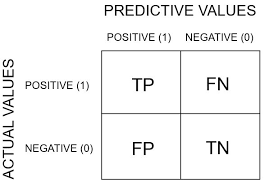

In [687]:
cm = confusion_matrix(ytest, y_pred) 
  
cm

array([[62,  5],
       [ 1, 41]])

In [688]:
print("Accuracy:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

Accuracy: 0.944954128440367
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.89      0.98      0.93        42

    accuracy                           0.94       109
   macro avg       0.94      0.95      0.94       109
weighted avg       0.95      0.94      0.95       109



# Find the best K

In [689]:
f1s = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain, ytrain)
    pred_i = knn.predict(Xtest)
    
    f1s.append(f1_score(ytest, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

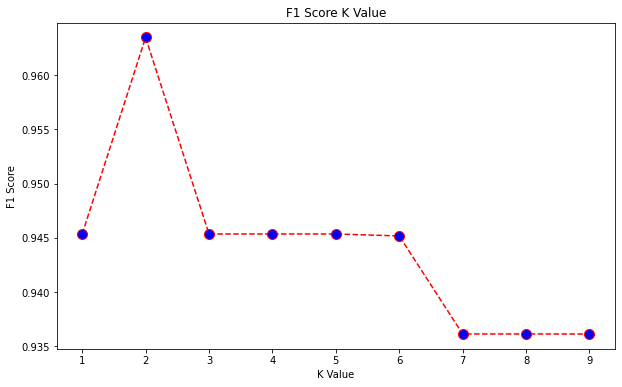

In [690]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [691]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Xtrain, ytrain)
y_pred = knn.predict(Xtest)

print("Accuracy:", accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

Accuracy: 0.963302752293578
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.93      0.98      0.95        42

    accuracy                           0.96       109
   macro avg       0.96      0.97      0.96       109
weighted avg       0.96      0.96      0.96       109

